In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [2]:
from langchain.chat_models import init_chat_model

In [3]:
model_id="gemini-2.5-flash-preview-05-20"
llm = init_chat_model(model=model_id,  model_provider="google_vertexai")

In [7]:
# llm

async for event in llm.astream_events("Hi this is khaja. What is latest update by google vertex"):
    if event["event"] == "on_chat_model_stream":
        print(event["data"]["chunk"].content)

Hi Khaja,

Google Vertex AI is constantly evolving, with new updates, features, and model integrations being rolled out regularly. The **absolute biggest focus and latest updates center around Generative AI**, specifically the integration and expansion of **Google
's Gemini family of models** and tools to build sophisticated AI applications.

Here's a breakdown of the key areas of recent updates:

1.  **Generative AI & Gemini Integration (The #1 Focus):**
    *   **Gemini 1.5 Pro & Gemini 1.5 Flash:**
 This is the most recent and significant update. These models offer a massive context window (up to 1 million tokens, with 2 million in private preview) and are highly optimized for performance and cost. They are now generally available or in public preview on Vertex AI.
    *   **Multimodality:** Gemini models
 excel at handling and understanding various data types simultaneously (text, images, audio, video). Vertex AI provides the tools to leverage this.
    *   **Function Calling & Too

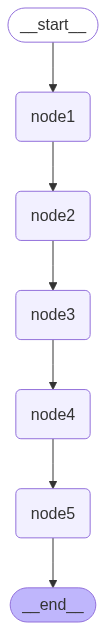

In [8]:
from typing import TypedDict
class MyState(TypedDict):
    message: str

from time import sleep
def node_1(state: MyState) -> MyState:
    state['message'] = "Im in node 1"
    sleep(2)
    return state

def node_2(state: MyState) -> MyState:
    state['message'] = "Im in node 2"
    sleep(2)
    return state

def node_3(state: MyState) -> MyState:
    state['message'] = "Im in node 3"
    sleep(2)
    return state

def node_4(state: MyState) -> MyState:
    state['message'] = "Im in node 4"
    sleep(2)
    return state

def node_5(state: MyState) -> MyState:
    state['message'] = "Im in node 5"
    sleep(2)
    return state

my_graph_builder = StateGraph(MyState)
my_graph_builder.add_node("node1", node_1)
my_graph_builder.add_node("node2", node_2)
my_graph_builder.add_node("node3", node_3)
my_graph_builder.add_node("node4", node_4)
my_graph_builder.add_node("node5", node_5)
my_graph_builder.set_entry_point("node1")
my_graph_builder.set_finish_point("node5")
my_graph_builder.add_edge("node1", "node2")
my_graph_builder.add_edge("node2", "node3")
my_graph_builder.add_edge("node3", "node4")
my_graph_builder.add_edge("node4", "node5")
my_graph = my_graph_builder.compile()

from utils import draw_graph
draw_graph(my_graph)

In [20]:
async for event in my_graph.astream_events({"message": ""}):
    # if event["event"] == "on_chain_stream" and event['data']['chunk']:
    #     print(f"{event['name']} response = {event['data']['chunk']}")
    if event["event"] == 'on_chain_end':
        print(event['data']['output']['message'])

Im in node 1
Im in node 2
Im in node 3
Im in node 4
Im in node 5
Im in node 5
